(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


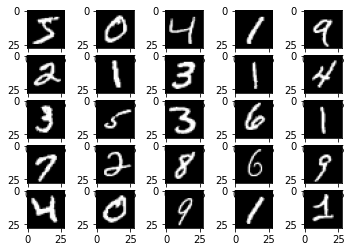

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4727 - accuracy: 0.8559 - val_loss: 0.1833 - val_accuracy: 0.9458
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2830 - accuracy: 0.9149 - val_loss: 0.1418 - val_accuracy: 0.9585
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2458 - accuracy: 0.9252 - val_loss: 0.1226 - val_accuracy: 0.9635
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2234 - accuracy: 0.9313 - val_loss: 0.1134 - val_accuracy: 0.9646
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2109 - accuracy: 0.9355 - val_loss: 0.1032 - val_accuracy: 0.9695
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2008 - accuracy: 0.9387 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1912 - accuracy: 0.9420 - val_loss: 0.0938 - val_ac

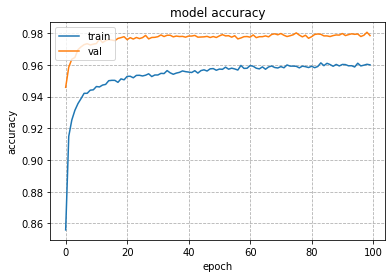

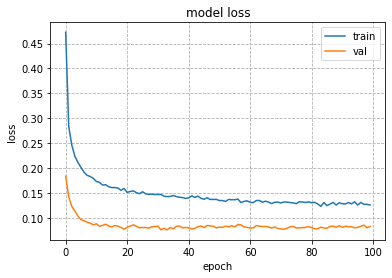

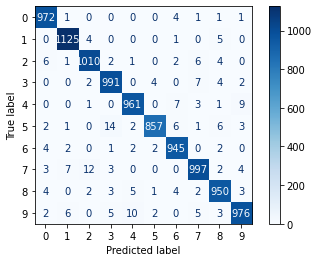

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# Run on Jupyter Notebook
# Workaround para o caso da linha anterior dar erro
# nesse caso comentar a linha de cima e descomentar as duas linhas seguintes

# import keras.api._v2.keras as keras
# from keras import layers

# Utilizar os datasets builtin do tensorflow - facilita a preparacao dos dados
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizacao dos valores de pixel para o intervalo [0 ... 1] - com imagens,
# este passo normalmente conduz a resultados melhores
x_train = x_train / 255.0
x_test = x_test / 255.0

# Preparar a ground truth para o formato adequado, usando 10 classes
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Id's das labels e dimensoes das imagens
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
img_height = 28
img_width = 28

# Mostrar as dimensoes das matrizes para treino e teste
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Visualizar as primeiras 25 imagens do dataset
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_train[i*5+j], cmap=plt.get_cmap('gray'))
plt.show()

# Desenvolver a partir daqui
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    #input layer
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))    #hidden layer
model.add(Dropout(0.5))
model.add(Dense(10, activation ='softmax')) #output layer
#To avoid overfitting on a "shallow" neural network we dropped % unit 
    
#Model loss function and Adam optimizer with learning rate of 0.001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the shallow neural network
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

# obter os id's das classes verdadeiras
y_true = np.argmax(y_test, axis=1)

#Test the trained model
output_pred = model(x_test)
y_pred = np.argmax(output_pred, axis=1)

#Creating Confunsion Matrix from the predicted/true outputs
cm = confusion_matrix(y_true, y_pred)


# mostrar figuras - accuracy, loss e matriz de confusao
# pode dar avisos de deprecated no pycharm pro - nao ligar a isso
plt.figure(num=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.grid(True, ls='--')
#
plt.figure(num=2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper right")
plt.grid(True, ls='--')
#
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [5]:
import statistics
print('Average Accuracy:', statistics.mean(history.history['val_accuracy'])*100,'%')

Average Accuracy: 97.66949999332428 %
